In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [5]:
data = pd.read_csv("diamonds.csv")

In [6]:
data.shape

(53940, 11)

In [7]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
Unnamed: 0    53940 non-null int64
carat         53940 non-null float64
cut           53940 non-null object
color         53940 non-null object
clarity       53940 non-null object
depth         53940 non-null float64
table         53940 non-null float64
price         53940 non-null int64
x             53940 non-null float64
y             53940 non-null float64
z             53940 non-null float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [12]:
data.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [14]:
data.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [15]:
data.corr()

,Unnamed: 0,carat,depth,table,price,x,y,z
Unnamed: 0,1.000000,-0.377983,-0.034800,-0.100830,-0.306873,-0.405440,-0.395843,-0.399208
carat,-0.377983,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,-0.034800,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,-0.100830,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,-0.306873,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,-0.405440,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,-0.395843,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,-0.399208,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


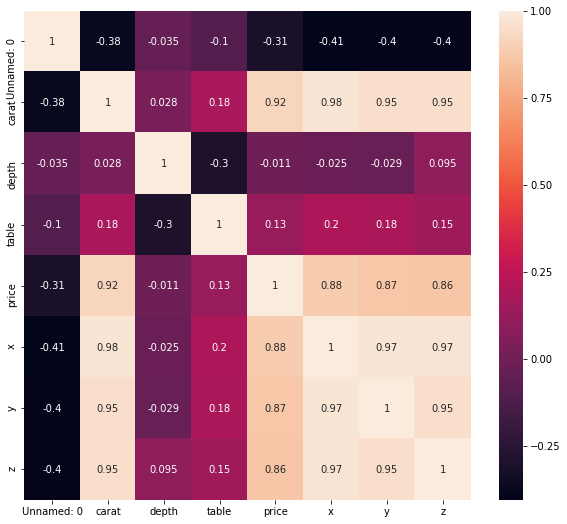

In [17]:
plt.figure(figsize=(10,9))
sns.heatmap(data.corr(),annot=True)

In [18]:
data.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [20]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [21]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [25]:
cat_col = data.select_dtypes(include="object")

In [26]:
num_col = data.select_dtypes(exclude="object")

In [27]:
num_col.columns

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z'], dtype='object')

In [28]:
num_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 7 columns):
carat    53940 non-null float64
depth    53940 non-null float64
table    53940 non-null float64
price    53940 non-null int64
x        53940 non-null float64
y        53940 non-null float64
z        53940 non-null float64
dtypes: float64(6), int64(1)
memory usage: 2.9 MB


In [29]:
X = num_col.drop("price",axis=1)
y = num_col["price"]

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [31]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(37758, 6) (16182, 6) (37758,) (16182,)


In [32]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [33]:
linreg.coef_

array([10703.73318883,  -189.66954368,   -95.20438599, -3497.64224914,
        2352.08369185,  -103.96999513])

In [34]:
linreg.intercept_

19510.52257952307

In [36]:
y_pred = linreg.predict(x_test)

In [37]:
result = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
result

,Actual,Predicted
53763,2726,3724.549910
15336,6159,5526.810186
17032,6803,6032.175963
8630,4449,6486.045409
33293,462,662.700312
17203,6872,6251.747854
33673,837,954.756474
29557,705,721.455450
27660,18640,14411.952982
35738,911,139.786893


In [38]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred,y_test)

3388061.8303197245

In [39]:
from sklearn.metrics import r2_score
r2_score(y_pred,y_test)

0.775813713561849

In [40]:
cat_col

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2
5,Very Good,J,VVS2
6,Very Good,I,VVS1
7,Very Good,H,SI1
8,Fair,E,VS2
9,Very Good,H,VS1


In [42]:
cat_col["cut"].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [43]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
lb.fit(cat_col["cut"])

LabelEncoder()

In [48]:
cat_col["cut"] = lb.transform(cat_col["cut"])

C:\Users\Anil\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [49]:
cat_col["cut"]

0        2
1        3
2        1
3        3
4        1
5        4
6        4
7        4
8        0
9        4
10       1
11       2
12       3
13       2
14       3
15       3
16       2
17       1
18       1
19       4
20       1
21       4
22       4
23       4
24       4
25       4
26       3
27       4
28       4
29       4
        ..
53910    3
53911    3
53912    3
53913    1
53914    1
53915    2
53916    1
53917    4
53918    3
53919    2
53920    4
53921    4
53922    4
53923    2
53924    2
53925    2
53926    2
53927    1
53928    3
53929    2
53930    3
53931    3
53932    4
53933    4
53934    3
53935    2
53936    1
53937    4
53938    3
53939    2
Name: cut, Length: 53940, dtype: int64